# Homework 5: Probability and Hypothesis Testing
## Due Friday May 14th at 11:59pm

Welcome to Homework 05! This week, we will go over probability and hypothesis testing. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

### Instructions

This assignment is due Friday, May 14th at 11:59pm. You are given six slip days thoughout the quarter which can extend the deadline by one day. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

You should start early so that you have time to get help if you're stuck. You may attend any Tutor's Office Hours. The calendar and links are available on Canvas.

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Remember that you may work in pairs for this assignment! If you work in a pair, you should submit one notebook to Gradescope for the both of you.

Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# please don't change this cell, but do make sure to run it
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

## 1. Among Us

Among Us is an online game that has recently exploded in popularity, in which it is best described as a social deduction game to identify an Impostor from all the Crewmates. If you want to learn more about the game (or play, it's free!), check out their [wiki](https://among-us.fandom.com/wiki/Among_Us) or watch gameplay on YouTube, but for the purposes of this question, we will provide all the necessary information.

Within Among Us, you choose a color to assign to your character and are then randomly selected to either be a Crewmate or an Impostor. Being the analytical person you are, you notice that there are some colors that are chosen to be Impostor more than others. You decide to explore this by ranking the colors from most probable to least probable of being Impostor. Your model is:

<table>
    <tr><th>Player</th><th>Estimated Chance of Impostor</th></tr>
    <tr><td>Red</td><td>13%</td></tr>
        <tr><td>Orange</td><td>8%</td></tr>
        <tr><td>Yellow</td><td>10%</td></tr>
        <tr><td>Green</td><td>11%</td></tr>
       <tr> <td>Lime</td><td>5%</td></tr>
        <tr><td>Blue</td><td>7%</td></tr>
        <tr><td>Cyan</td><td>9%</td></tr>
        <tr><td>Purple</td><td>8%</td></tr>
    <tr><td>Pink</td><td>4%</td></tr>
    <tr><td>Black</td><td>10%</td></tr>
    <tr><td>White</td><td>7%</td></tr>
    <tr><td>Brown</td><td>8%</td></tr>
</table>

**Question 1.1.** Write down your probability distribution as an *array*. It should contain 12 elements, each describing the probability of a color being Impostor, and it should sum to 1. Name this array `among_us_distribution`.


In [2]:
among_us_distribution = np.array([.13,.08,.10,.11,.05,.07,.09,.08,.04,.10,.07,.08])
among_us_distribution

array([0.13, 0.08, 0.1 , 0.11, 0.05, 0.07, 0.09, 0.08, 0.04, 0.1 , 0.07,
       0.08])

In [3]:
grader.check("q11")

q11 passed!

**Question 1.2.** The color that you select for your character is Green -- you estimate that you have a 11% chance of being an Impostor in any given game. Over the course of this quarantine, you play in 100 games, and are only selected to be Impostor three times. You start to suspect that 10% might be *too high* of an estimate, and that your model is wrong.

Using your model in which you have a 11% chance of being Impostor as your null hypothesis, write a simulation that runs 100 games and keeps track of the absolute difference between how many games you are Impostor and the number you'd expect to be Impostor (11) if your model is right. Run your simulation 5000 times. Keep track of the differences in an array called `among_us_differences`.

<AxesSubplot:ylabel='Frequency'>

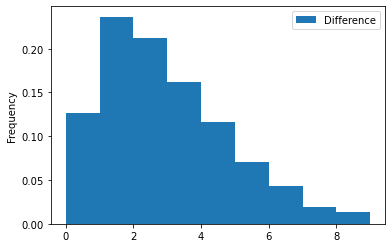

In [4]:
n_repetitions = 5000
among_us_differences = np.array([])
model_proportions = [.11, .89]

for i in np.arange(n_repetitions):
    simulation = np.random.multinomial(100, model_proportions)
    difference = abs(simulation[0] - 11)
    among_us_differences = np.append(among_us_differences, difference)

#: Visualize with a histogram
bpd.DataFrame().assign(Difference = among_us_differences).plot(kind='hist', bins=np.arange(10), density=True)

In [5]:
grader.check("q12")

q12 passed!

**Question 1.3.** Your null hypothesis was that you have a 11% chance of being an Impostor, but you only got Impostor 3 times out of 100. Set the variable `among_us_null_hypothesis` below to `True` if you think your model is plausible or `False` if it should be rejected. You should reject only if it is very unlikely that you would be Impostor three times under the null hypothesis.

In [6]:
# if the p-value is less than or equal to .05, then the null hypothesis is wrong:

among_us_null_hypothesis = False
among_us_null_hypothesis

False

In [7]:
grader.check("q13")

q13 passed!

**Question 1.4.** Now, we check the p-value of our claim. That is, compute the proportion of times in our simulation that we saw a difference of 8 or more between the number of times you were Impostor and the expected number of being Impostor. Assign your result to `p_value_1_4`

In [8]:
p_value_1_4 = np.count_nonzero(among_us_differences >= 8) / 5000
p_value_1_4

0.0164

In [9]:
grader.check("q14")

q14 passed!

## 2. A distribution of M&M's

The color for [M&M's](https://en.wikipedia.org/wiki/M%26M%27s) is changing all the time, with each package containing 6 colors now (brown, red, orange, yellow, green, and blue) currently. However, since different colors are made separately by different machines and combined/packaged into bags for sale, the M&M's color may not distributed uniformly. The comma-separated file `m&m.csv` contains the color of 468 bags of M&M's.

Look at the color distribution by bag in the dataset below:

In [10]:
m = bpd.read_csv("data/m&m.csv")
m

,red,orange,yellow,green,brown,blue
0,10,15,11,7,18,10
1,5,12,17,15,10,9
2,16,11,15,11,9,11
3,15,8,13,16,7,13
4,11,14,20,8,7,11
...,...,...,...,...,...,...
463,11,11,12,13,11,12
464,17,10,8,11,12,13
465,9,14,12,10,15,12
466,12,14,11,10,10,16


**Question 2.1.** Combine all bags together to count up all the M&M's with the same color. Then calculate the probability of each color over the all 6 colors. Write down your probability distribution as an *array*. It should contain 6 elements, each describing the probability of a color come out from the factory, and it should sum to 1. Name this array `color_distribution`.

In [11]:
m = m.assign(bags=np.arange(1,469)).set_index('bags')
red = m.get('red').sum()
orange = m.get('orange').sum()
yellow = m.get('yellow').sum()
green = m.get('green').sum()
brown = m.get('brown').sum()
blue = m.get('blue').sum()
total_mm = red + orange + yellow + green + brown + blue

def pro(color):
    return color/total_mm
    
color_distribution = np.array([pro(red),pro(orange),pro(yellow),pro(green),pro(brown),pro(blue)])
color_distribution

array([0.16748163, 0.16496175, 0.17063147, 0.15902205, 0.1700615 ,
       0.16784161])

In [12]:
grader.check("q21")

q21 passed!

**Question 2.2.** We assume that all colors should distributed uniformly overall. Let's create an empirical distribution for each color, and name it `empirical_color_distribution` and make sure all probabilities sum up to 1.

In [13]:
empirical_color_distribution = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
empirical_color_distribution

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [14]:
grader.check("q22")

q22 passed!

**Question 2.3.** You wish to check the bias in the colors of M&Ms and see if they are distributed uniformly. However, there are six categories of M&M colors: red, orange, yellow, green, brown, and blue. Which among the following do you think is **not** a reasonable choice of test statistic for your hypothesis. You may include more than one answer. Append all your choices in a *list* called `unreasonable_test_statistics`. For example, if you think statistics 1, 2, and 3 are unreasonable, you should have `unreasonable_test_statistics = [1,2,3]`

1. The total variation distance between the probability distribution of expected proportion of colors and the distribution of actual proportion of colors
2. The total number of M&Ms that the company made in our dataset.
3. Sum of the absolute difference between expected proportion of colors and actual proportion of colors
4. Average of the sum of the proportion of expected proportion of colors and the proportion of actual proportion of colors
5. The absolute difference between the sum of expected proportion of colors and the sum of actual proportion of colors.
6. Average of the absolute difference between expected proportion of colors and actual proportion of colors.

In [15]:
unreasonable_test_statistics = [1,6]

In [16]:
grader.check("q23")

q23 passed!

**Question 2.4.** We want to test if the color are distributed uniformly. Assume we have total of 38000 M&M's. Write a simulation and run it 5000 times, maintaining an array `tvd_color` which keeps track of the total variance distance under the generated distribution by the empirical distribution. Save the test statistics in `tvd_color`.

<AxesSubplot:ylabel='Frequency'>

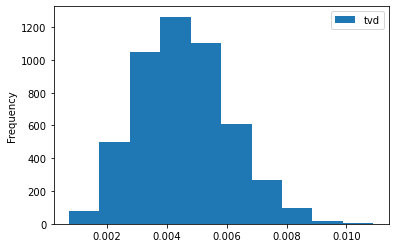

In [17]:
def total_variation_distance(first_distrib, second_distrib):
    # it might be helpful to create a function for computing the TVD
    # you can do so here
     return np.abs((first_distrib - second_distrib)).sum() / 2
    
tvd_color = np.array([])
for i in np.arange(5000):
    distribution = np.random.multinomial(38000, empirical_color_distribution) / 38000
    tvd_color = np.append(tvd_color, total_variation_distance(empirical_color_distribution, distribution))
        
#: Visualize with a histogram
bpd.DataFrame().assign(tvd = tvd_color).plot(kind='hist')

In [18]:
grader.check("q24")

q24 passed!

**Question 2.5.** Calculate the TVD between observed distribution and our empirical distribution. Assign it to `obs_tvd`.

In [19]:
obs_tvd = total_variation_distance(empirical_color_distribution, color_distribution)
obs_tvd

0.009349532523373824

In [20]:
grader.check("q25")

q25 passed!

**Question 2.6.** Now, we check the p-value of our claim. That is, compute the proportion of times in our simulation that we saw a TVD greater or equal to our observed TVD. Assign your result to `p_value_4_5`. Also, assign a conclusion of whether we should reject the null hypothesis. Set the variable `null_hypothesis_4` below to `True` if you think the color difference is by chance or `False` if it should be rejected.

In [21]:
p_value_4_5 = np.count_nonzero(tvd_color >= obs_tvd) / 5000
null_hypothesis_4 = False
p_value_4_5, null_hypothesis_4

(0.003, False)

In [22]:
grader.check("q26")

q26 passed!

## 3. Loaded Die

... And we are back to rolling dice! A loaded die is one that is unfair, i.e., does not have equal probability for each of the outcomes 1–6 (inclusive).

**Question 3.1.** Your friend Judy has a model that says that the die is loaded in a way such that the probability of "3" coming up is 0.2, the probability of "1" coming up is 0.3 and all the other values have the same probabilities. 

Write down Judy's model's distribution as an *array*. It should contain 6 elements, each describing the probability of seeing the corresponding face of the die (from 1 to 6), and it should sum to 1.

In [23]:
judy_hypothesis_model_distribution = np.array([0.3, 0.125, 0.2, 0.125, 0.125, 0.125])
judy_hypothesis_model_distribution

array([0.3  , 0.125, 0.2  , 0.125, 0.125, 0.125])

In [24]:
grader.check("q31")

q31 passed!

**Question 3.2.** Say we want to test Judy's model. To make it simple, we only want to test if the probability of "1" coming up is 0.3. We roll the die 20 times and we got "1" a whopping 2 times. We claim that Judy's model is wrong. In order to substantiate our claim, we run a simulation of the die-roll.

Write a simulation and run it 5000 times, maintaining an array `differences` which keeps track of the absolute difference between number of '1's that were seen and the expected number in each simulation.

<AxesSubplot:ylabel='Frequency'>

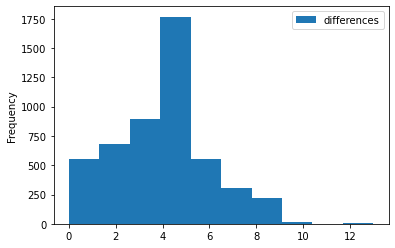

In [25]:
n_repetitions = 5000
differences = np.array([])

for i in np.arange(n_repetitions):
    simulation = np.random.multinomial(20, judy_hypothesis_model_distribution)
    difference = abs(2 - simulation[0])
    differences = np.append(differences, difference)
    
#: Visualize with a histogram
bpd.DataFrame().assign(differences=differences).plot(kind='hist')

In [26]:
grader.check("q32")

q32 passed!

**Question 3.3.** Recall that we saw the die come up "1" only 2 times. Set the variable `null_hypothesis_boolean` below to `True` if you think Judy's model is plausible or `False` if it should be rejected.

In [27]:
null_hypothesis_boolean = True

In [28]:
grader.check("q33")

q33 passed!

**Question 3.4.** Now, we check the p-value of our claim. That is, compute the proportion of times in our simulation that we saw a difference of 4 or more between the number of '3's and the expected number of '3's. Assign your result to `p_value_3_4`

In [29]:
p_value_3_4 = np.count_nonzero(differences >= 4) / 5000
p_value_3_4

0.574

In [30]:
grader.check("q34")

q34 passed!

# Finish Line

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [31]:
grader.check_all()

q11 passed!

q12 passed!

q13 passed!

q14 passed!

q21 passed!

q22 passed!

q23 passed!

q24 passed!

q25 passed!

q26 passed!

q31 passed!

q32 passed!

q33 passed!

q34 passed!